## Notebook settings

In [1]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

## Imports

In [14]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import logging
import tpvalidator.workspace as workspace
import tpvalidator.utilities as utils
import tpvalidator.analyzers.snn as snn

from rich import print
from tpvalidator.utilities import temporary_log_level, subplot_autogrid, pandas_backend
from tpvalidator.histograms import uproot_hist_mean_std


# Load ADC mean and standard deviation from wafevorm histograms

In [5]:
ws = None
with temporary_log_level(workspace.TriggerPrimitivesWorkspace._log, logging.INFO):
    ws = workspace.TriggerPrimitivesWorkspace("../data/vd/bkg/100events/tptree_st_tpg_vd_radiols.root ")

print(ws.info)

{
    'geo': {'detector': 'dunevd10kt_3view_30deg_v5_refactored_1x8x6ref'},
    'mc_generator_labels': [
        'CavernNGammasAtLAr1x8x6',
        'Rn222ChainBi214GenInLAr',
        'Rn222ChainFromBi214GenInUpperMesh1x8x6',
        'Th232ChainGenInAnode',
        'CavernwallGammasAtLAr1x8x6',
        'Rn222ChainFromPb210GenInUpperMesh1x8x6',
        'Rn222ChainFromPb214GenInUpperMesh1x8x6',
        'Rn222ChainPo218GenInLAr',
        'Rn222ChainPb214GenInLAr',
        'Ar39GenInLAr',
        'Rn222ChainPb210GenInLAr',
        'Rn222ChainFromPo218GenInUpperMesh1x8x6',
        'Rn222ChainFromBi210GenInUpperMesh1x8x6',
        'Ar42GenInLAr',
        'Rn222ChainGenInPDS',
        'K42From42ArGenInLAr',
        'Rn220ChainPb212GenInLAr',
        'CavernwallNeutronsAtLAr1x8x6',
        'K40GenInAnode',
        'U238ChainGenInCathode',
        'Rn222ChainRn222GenInLAr',
        'Th232ChainGenInCathode',
        'K42From42ArGenInUpperMesh1x8x6',
        'foamGammasAtLAr1x8x6',
        'K40GenInCathode',
        'U238ChainGenInAnode',
        'Kr85GenInLAr',
        'CryostatNGammasAtLAr1x8x6',
        'Rn220ChainFromPb212GenInUpperMesh1x8x6'
    ],
    'tpg': {
        'threshold_tpg_plane0': 23,
        'threshold_tpg_plane1': 23,
        'threshold_tpg_plane2': 26,
        'tool': 'TPAlgTPCSimpleThreshold'
    },
    'tptree': {'U_window_offset': 8, 'V_window_offset': 1, 'X_window_offset': -7}
}

In [9]:
ws.add_rawdigits('../data/vd/bkg/100events/trigger_digits_waves_detsim_vd_radiols.root')

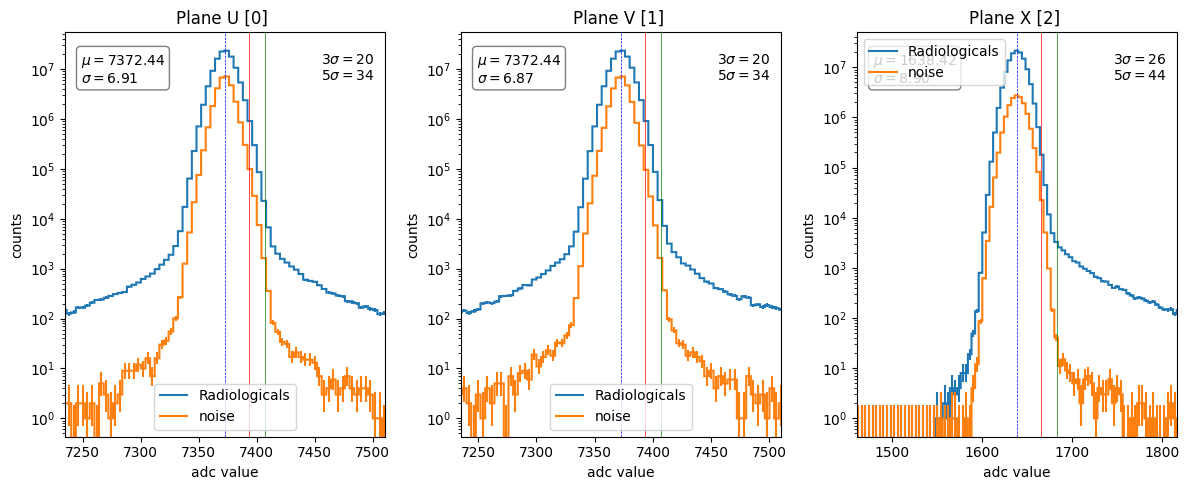

In [10]:
fig = snn.draw_signal_and_noise_adc_distros(ws, signal_label='Radiologicals')
fig.tight_layout()

# TP sample validation
## Distribution of point of origin in the detector

In [11]:
all_tps = snn.TPSignalNoisePreSelection(ws.tps)
alltp_ana = snn.TPSignalNoiseAnalyzer(all_tps)

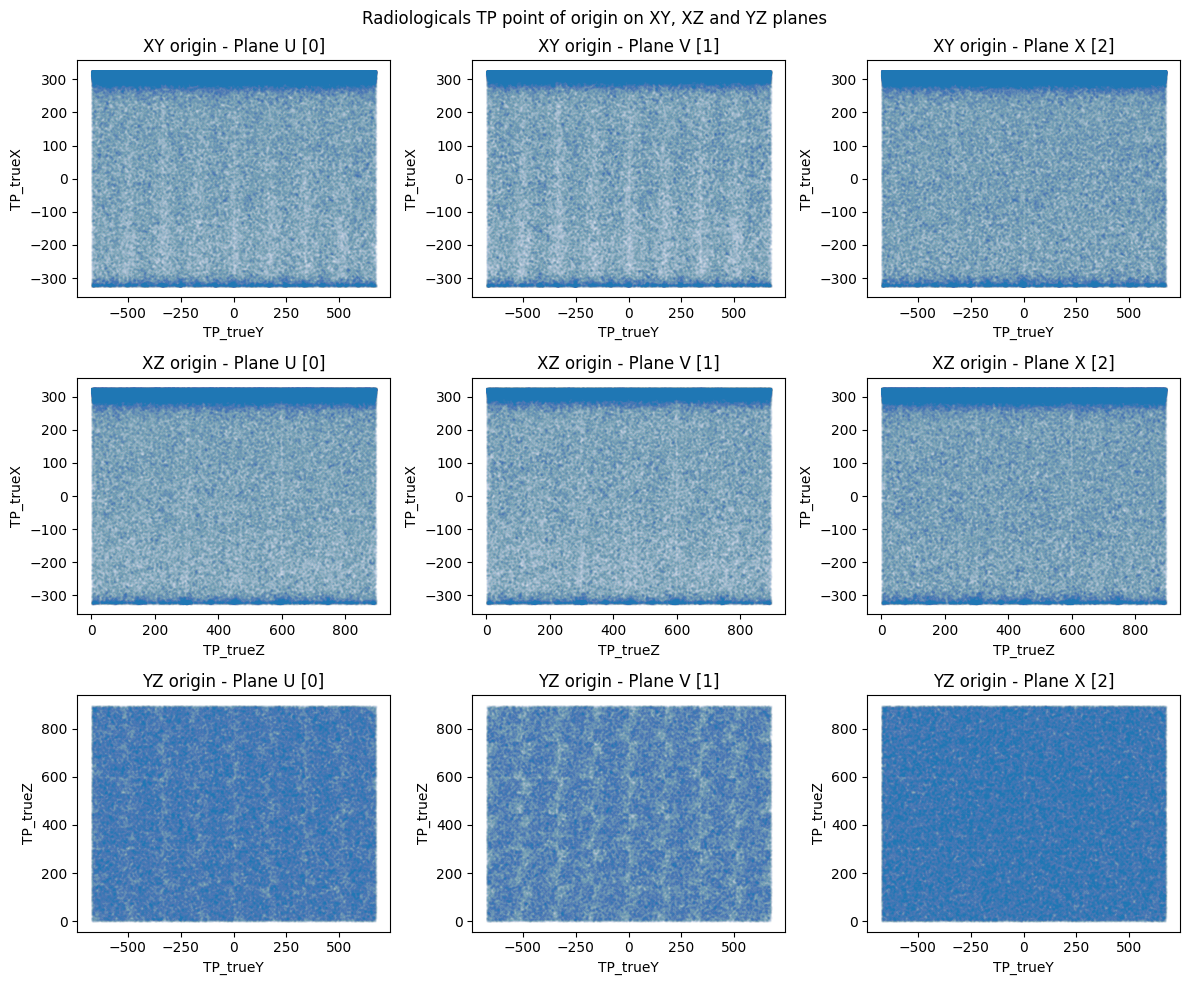

In [12]:
fig = alltp_ana.draw_tp_sig_origin_2d_dist(signal_label='Radiologicals')
fig.tight_layout()

In [15]:
pd.options.plotting.backend = 'plotly'
import plotly.express as px
# ws.tps.query('event == 1 & TP_peakADC > 50').plot.scatter(x='TP_channel', y='TP_peakT', size='TP_peakADC', color_continuous_scale=px.colors.sequential.Viridis, height=500, width=600)

pd.options.plotting.backend = 'matplotlib'
with pandas_backend('plotly') as x:
    f = ws.tps.query('event == 1 & TP_peakADC > 50').plot.scatter(x='TP_channel', y='TP_peakT', size='TP_peakADC', color="TP_signal", color_continuous_scale=px.colors.sequential.Viridis, height=800, width=900)
    f.show()


xxx

yyy

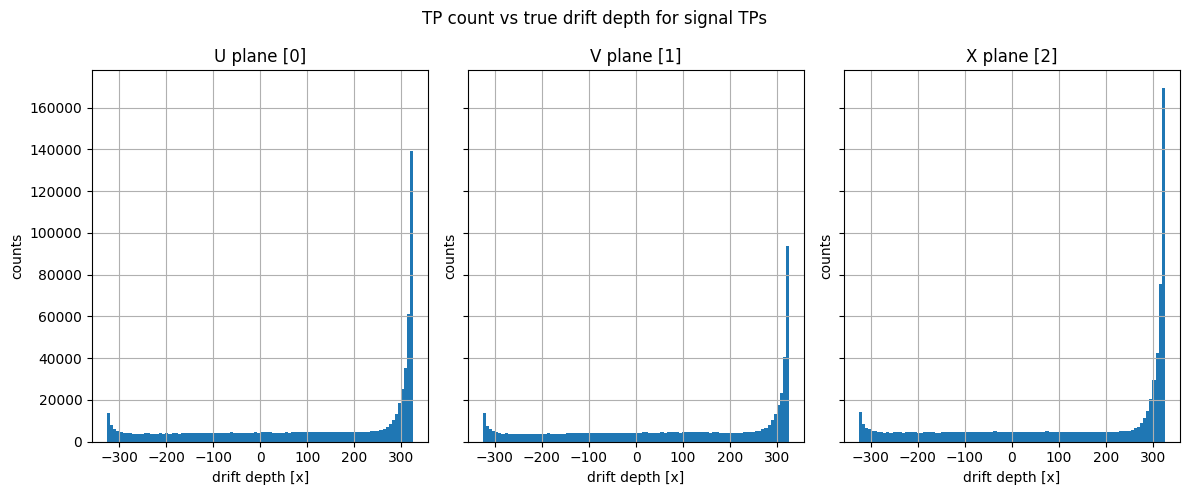

In [16]:
fig = alltp_ana.draw_tp_sig_drift_depth_dist()
fig.tight_layout()

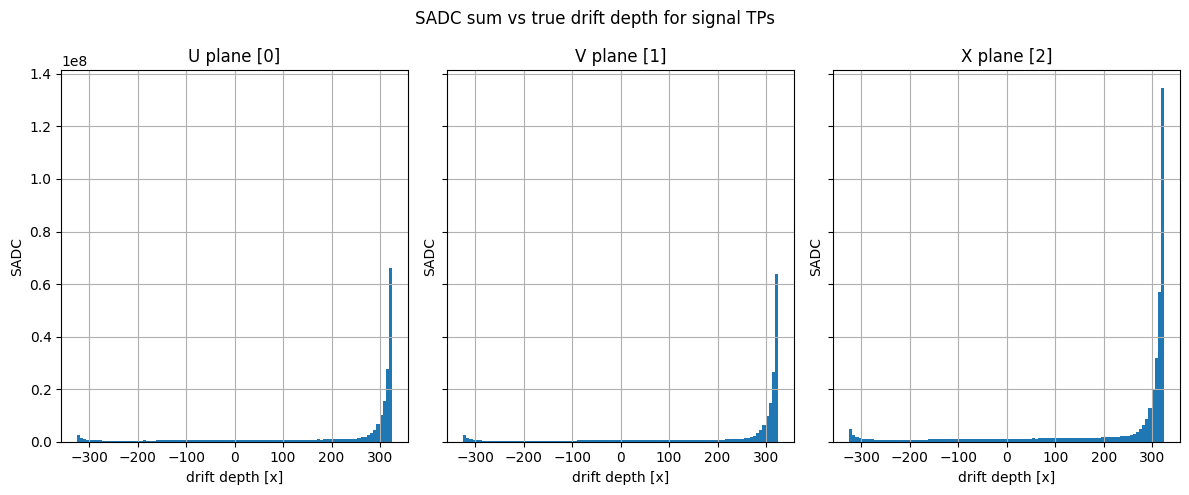

In [17]:
fig = alltp_ana.draw_tp_sig_drift_depth_dist(weight_by='SADC')

# Dataset validation: TP distributions

### TP distribution in channel and time - one event with increasing peak ADC cuts

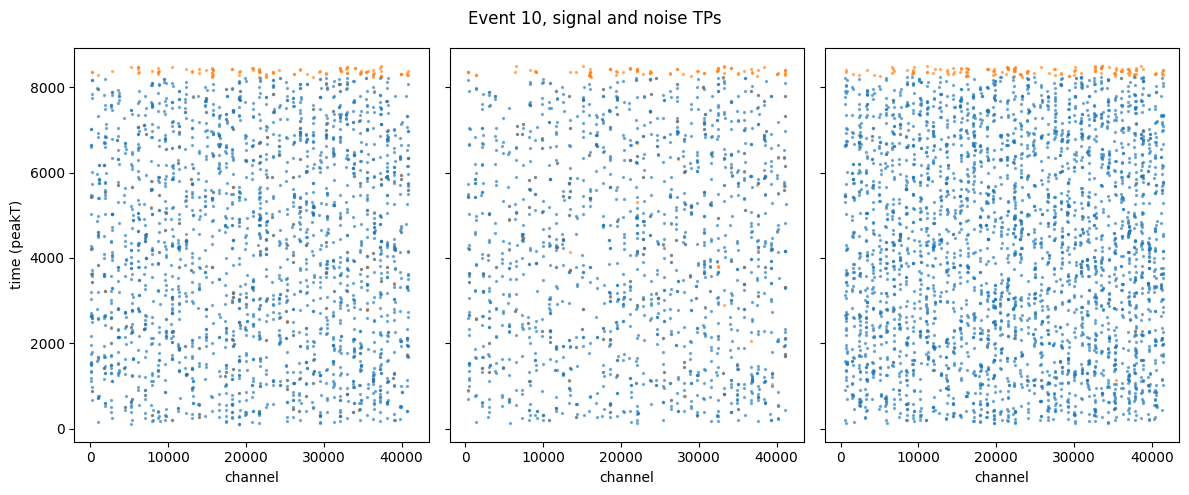

In [ ]:
x = snn.TPSignalNoiseAnalyzer(all_tps.query('TP_peakADC > 26'))
fig = x.draw_tp_event(10)
x = snn.TPSignalNoiseAnalyzer(all_tps.query('TP_peakADC > 36'))
fig = x.draw_tp_event(10)
x = snn.TPSignalNoiseAnalyzer(all_tps.query('TP_peakADC > 46'))
fig = x.draw_tp_event(10)
x = snn.TPSignalNoiseAnalyzer(all_tps.query('TP_peakADC > 56'))
fig = x.draw_tp_event(10)


# Dataset validation: TP distribution in time

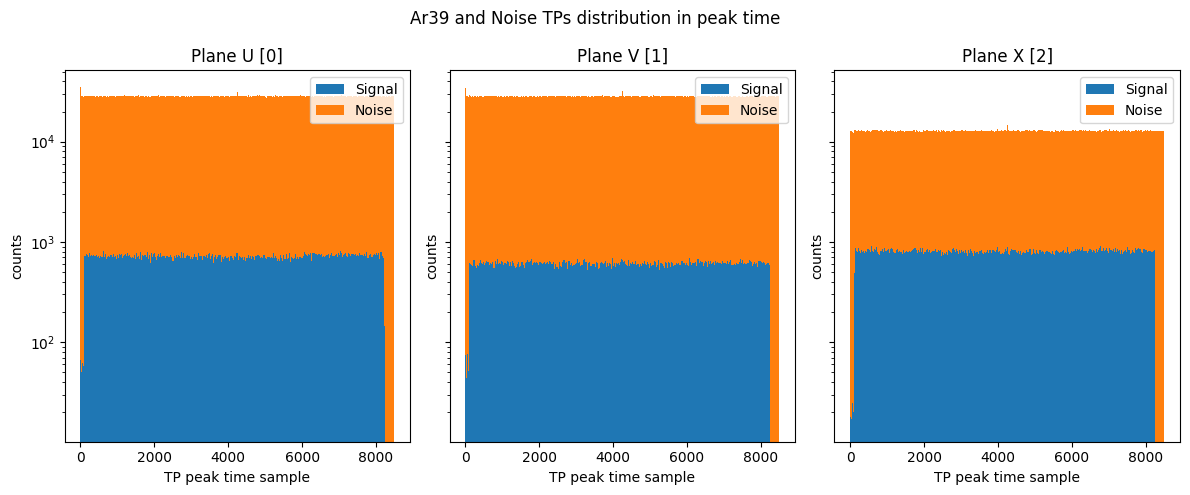

In [19]:
fig = alltp_ana.draw_tp_start_time_dist()
fig.tight_layout()

# Cleaning: removing regions with non-even backtracking efficiency

In [20]:
clean_tps = snn.TPSignalNoisePreSelection(ws.tps[(ws.tps.TP_startT >100) & (ws.tps.TP_startT <8100)])
tp_ana = snn.TPSignalNoiseAnalyzer(clean_tps)

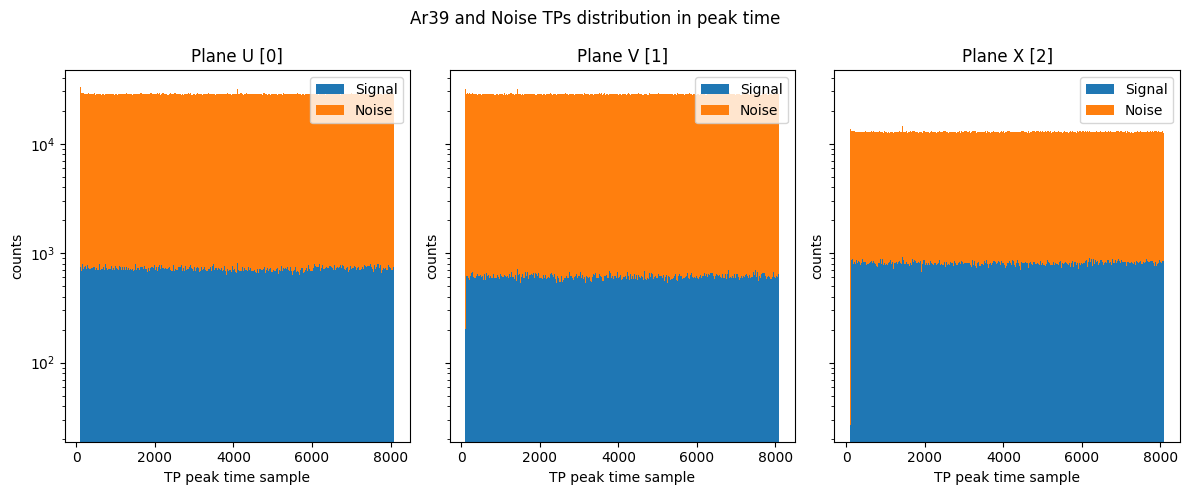

In [21]:
fig = tp_ana.draw_tp_start_time_dist()
fig.tight_layout()

# PeakADC, time-over-threshold and SumADC distribution for Ar39 and noise

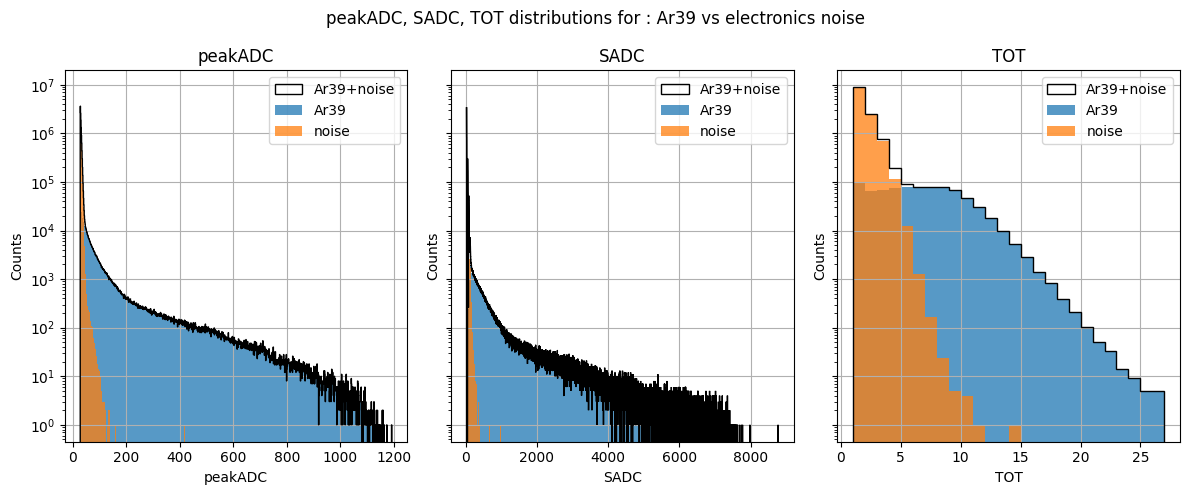

In [22]:
fig = tp_ana.draw_tp_signal_noise_dist()
fig.tight_layout()

/Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/analyzers/snn.py:402: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



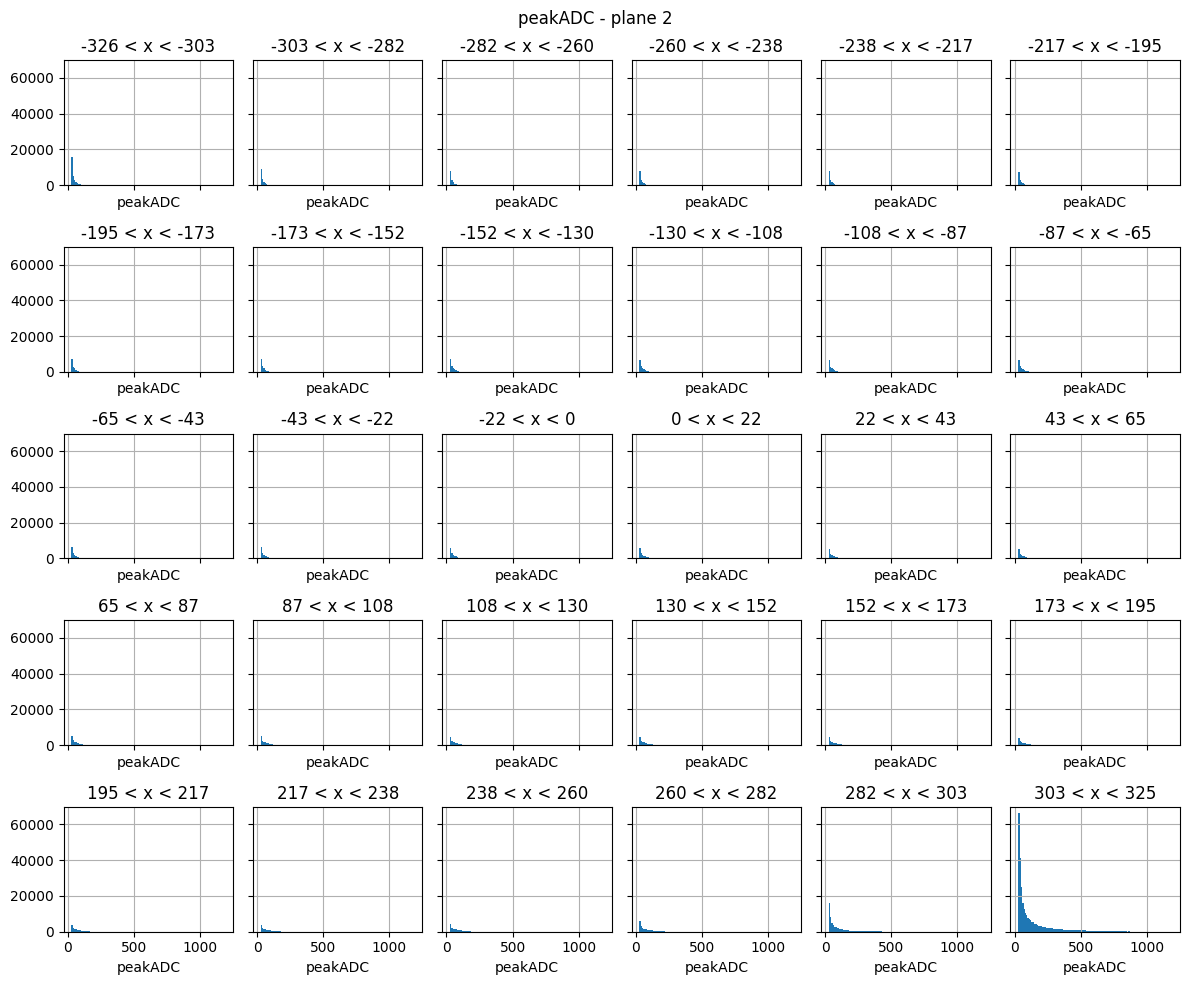

In [23]:
fig = tp_ana.draw_variable_in_drift_grid('peakADC', downsampling=10, sharex=True, sharey=True, figsize=(12,10))
fig.tight_layout()

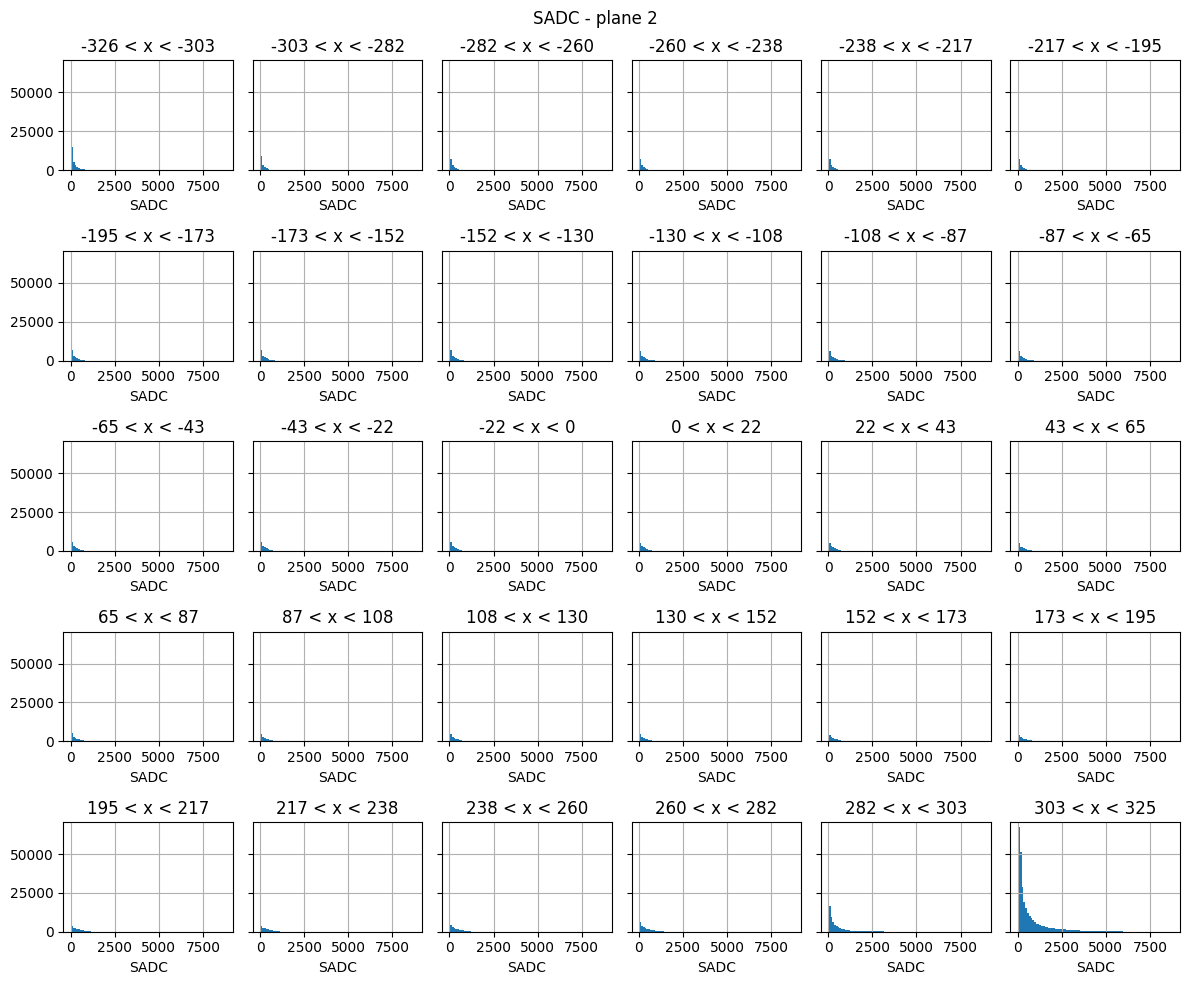

In [24]:
fig = tp_ana.draw_variable_in_drift_grid('SADC', downsampling=100, sharey=True, figsize=(12,10))
fig.tight_layout()

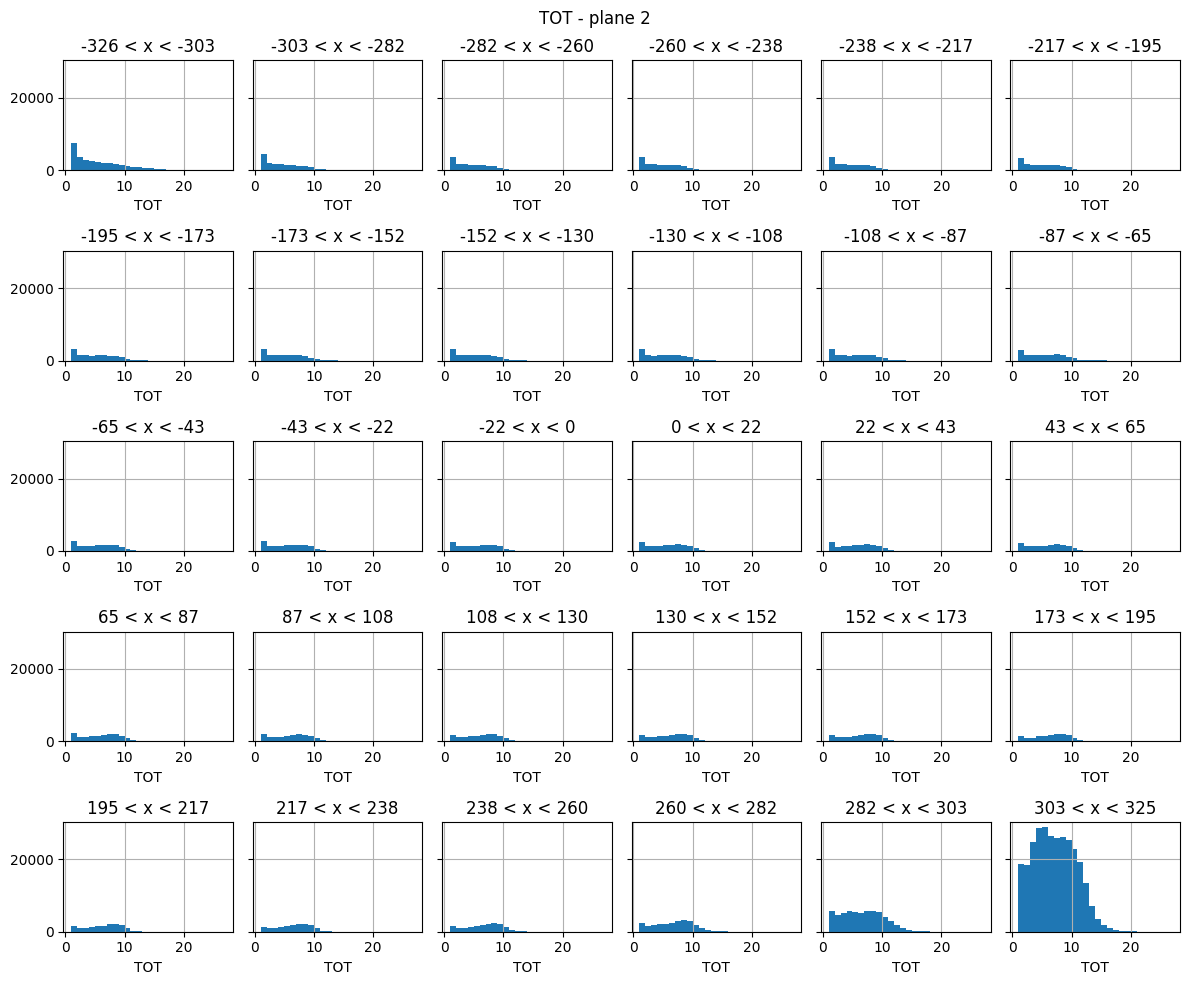

In [25]:
fig = tp_ana.draw_variable_in_drift_grid('TOT', downsampling=1, log=False, sharey=True, figsize=(12,10))
fig.tight_layout()

/Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/analyzers/snn.py:426: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



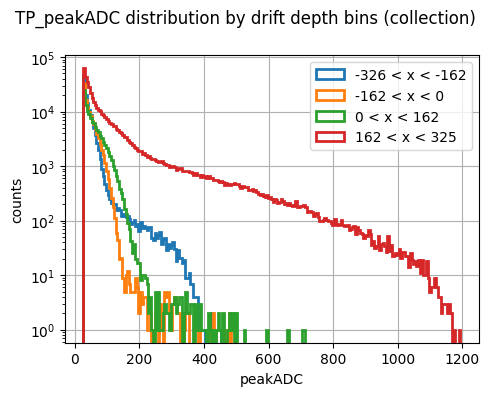

In [26]:
fig = tp_ana.draw_variable_drift_stack('peakADC', downsampling=5, n_x_bins=4, log=True, figsize=(5,4))
fig.tight_layout()

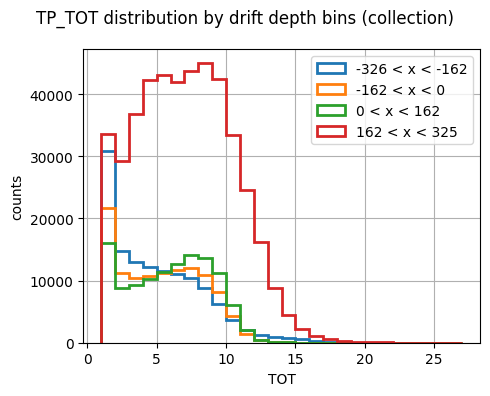

In [27]:
fig = tp_ana.draw_variable_drift_stack('TOT', downsampling=1, n_x_bins=4, log=False, figsize=(5,4))
fig.tight_layout()


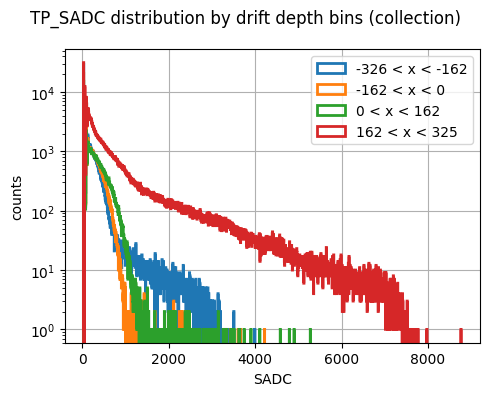

In [28]:
fig = tp_ana.draw_variable_drift_stack('SADC', downsampling=5, n_x_bins=4, log=True, figsize=(5,4))
fig.tight_layout()


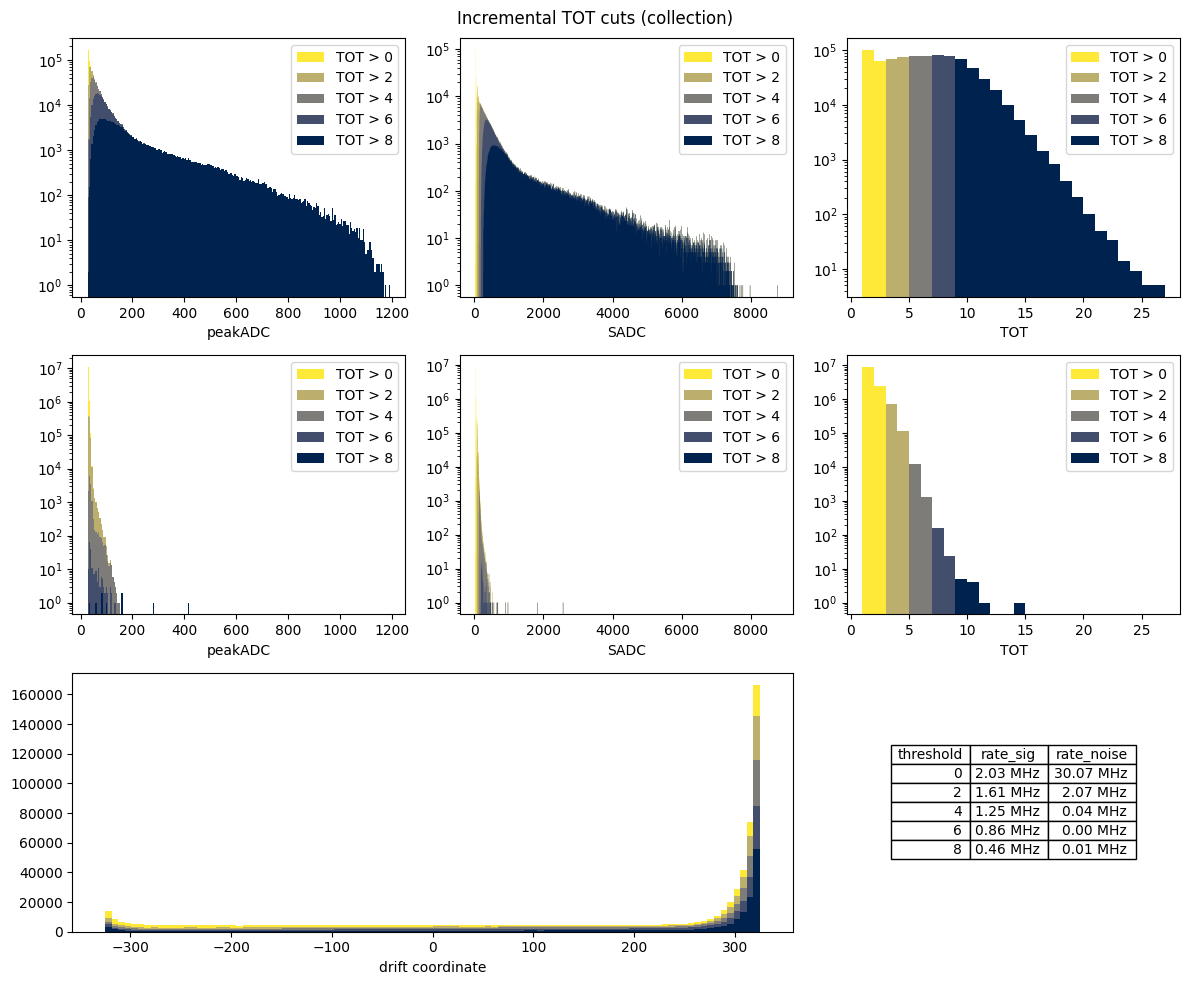

In [35]:
tot_cuts = [t for t in range(0,10,2)]

fig = tp_ana.draw_variable_cut_sequence('TOT', tot_cuts, log=True, figsize=(12,10))
fig.tight_layout()



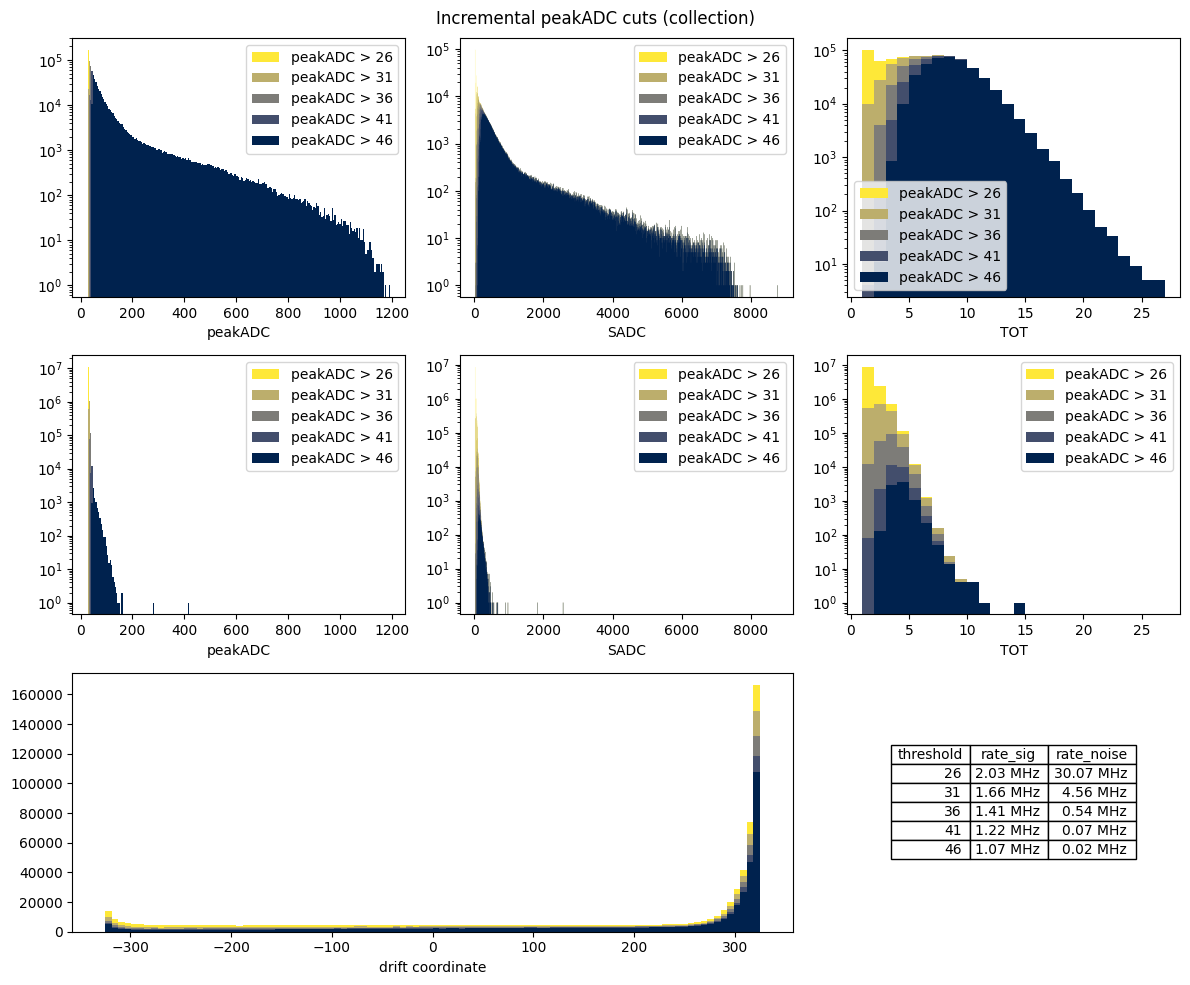

In [36]:
cuts = [t for t in range(26, 50, 5)]

fig = tp_ana.draw_variable_cut_sequence('peakADC', cuts, log=True, figsize=(12,10))
fig.tight_layout()

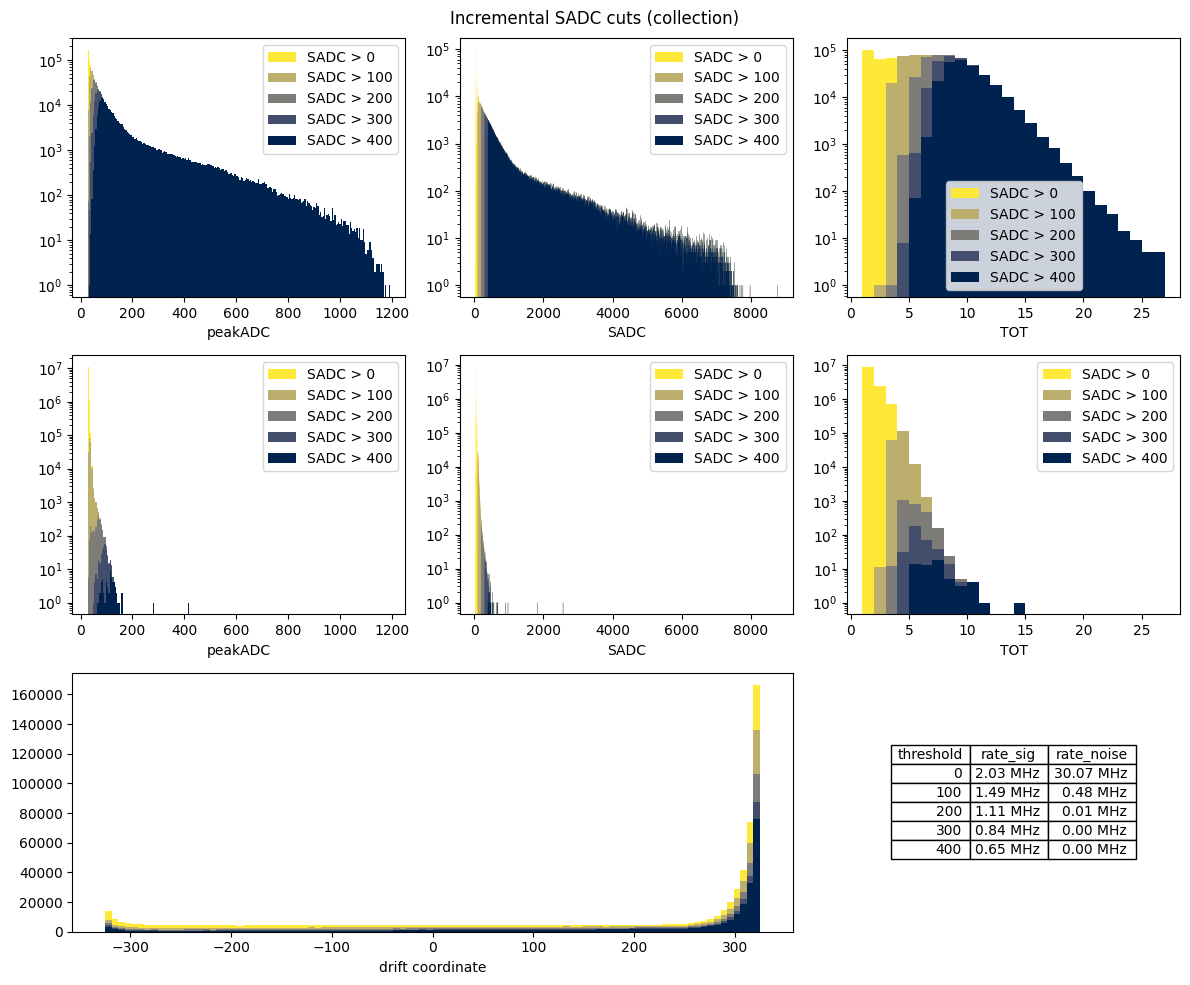

In [37]:
cuts = [t for t in range(0, 500, 100)]

fig = tp_ana.draw_variable_cut_sequence('SADC', cuts, figsize=(12,10), log=True)
fig.tight_layout()

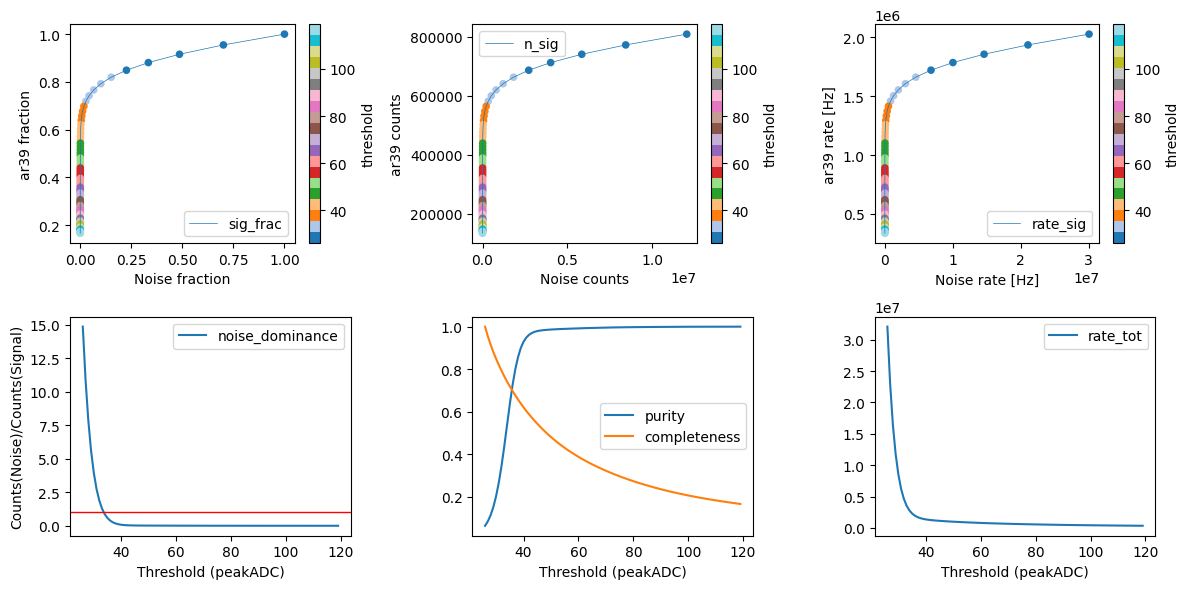

In [32]:
thresholds = [t for t in range(26, 120, 1)]

fig = tp_ana.draw_threshold_scan('peakADC', thresholds)
fig.tight_layout()

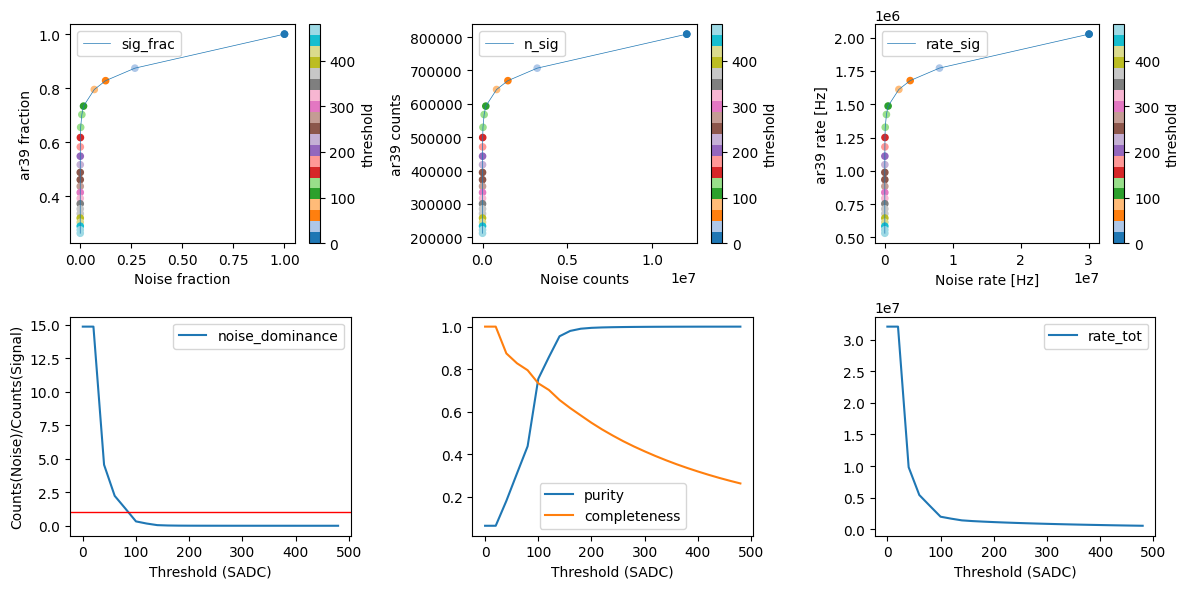

In [33]:
thresholds = [t for t in range(0, 500, 20)]

fig = tp_ana.draw_threshold_scan('SADC', thresholds)
fig.tight_layout()

# Investigating weird TP and IDES distributions

In [43]:
from tpvalidator.backtracker import BackTrackerPlotter

ws.ides = ws.ides[ws.ides.time < 8500]
bt = BackTrackerPlotter(ws, 1)

[1]
1
found 32831 channels
Loading tree into np arrays
Done loading tree into np arrays
Converting np arrays to dataframe
Done converting np arrays to dataframe
Expanding waveforms
Done expanding waveforms


/Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/workspace.py:177: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



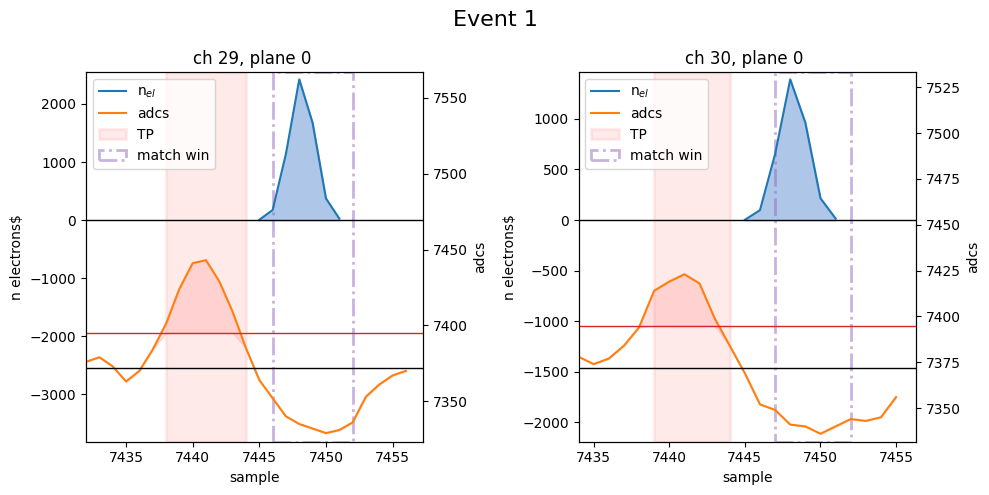

In [44]:
fig = bt.plot_tps_vs_ides([1,2], figsize=(10,5))
# fig.tight_layout()

No waveforms found for event '1'

No waveforms found for event '1'

No waveforms found for event '1'

No waveforms found for event '1'

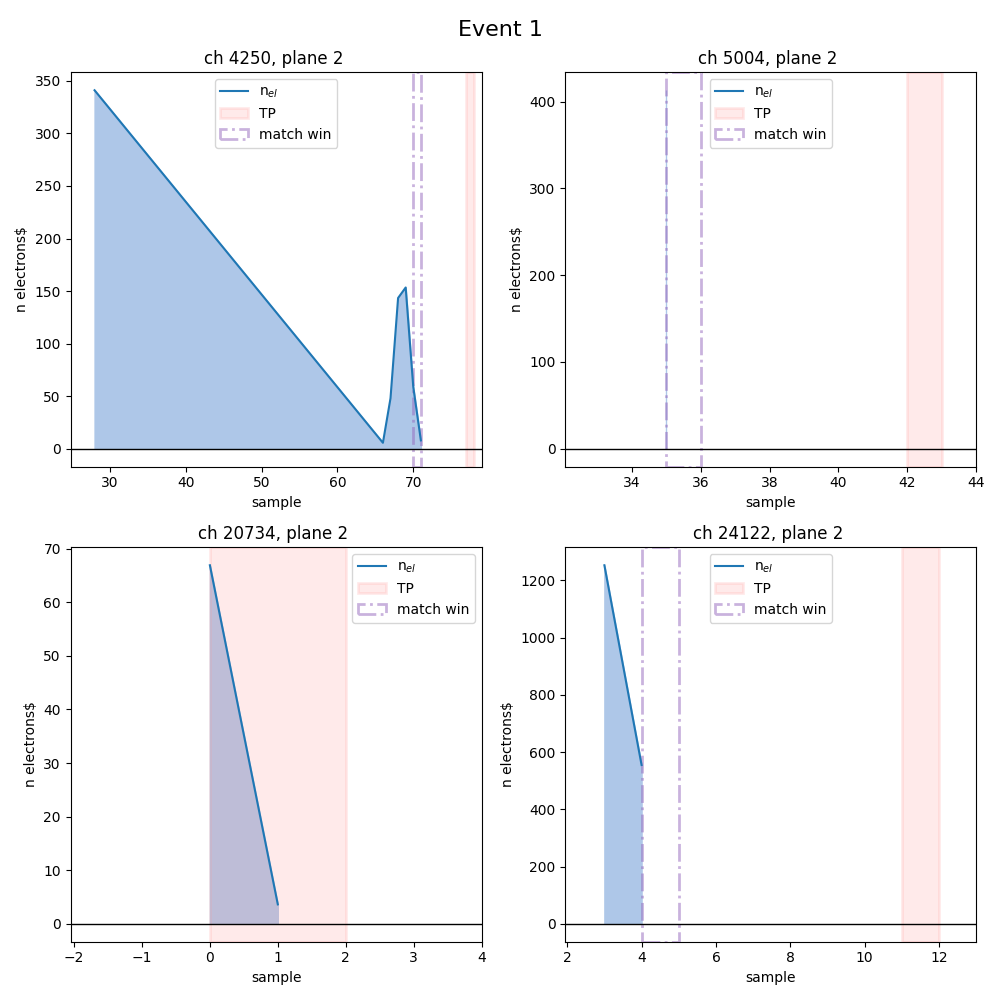

In [ ]:
my_tps = bt.inspect_tps[(bt.inspect_tps.TP_startT < 100) & (bt.inspect_tps.TP_plane == 2)].iloc[:9]
fig = bt.plot_tps_vs_ides(my_tps, figsize=(10,10))
fig.tight_layout()


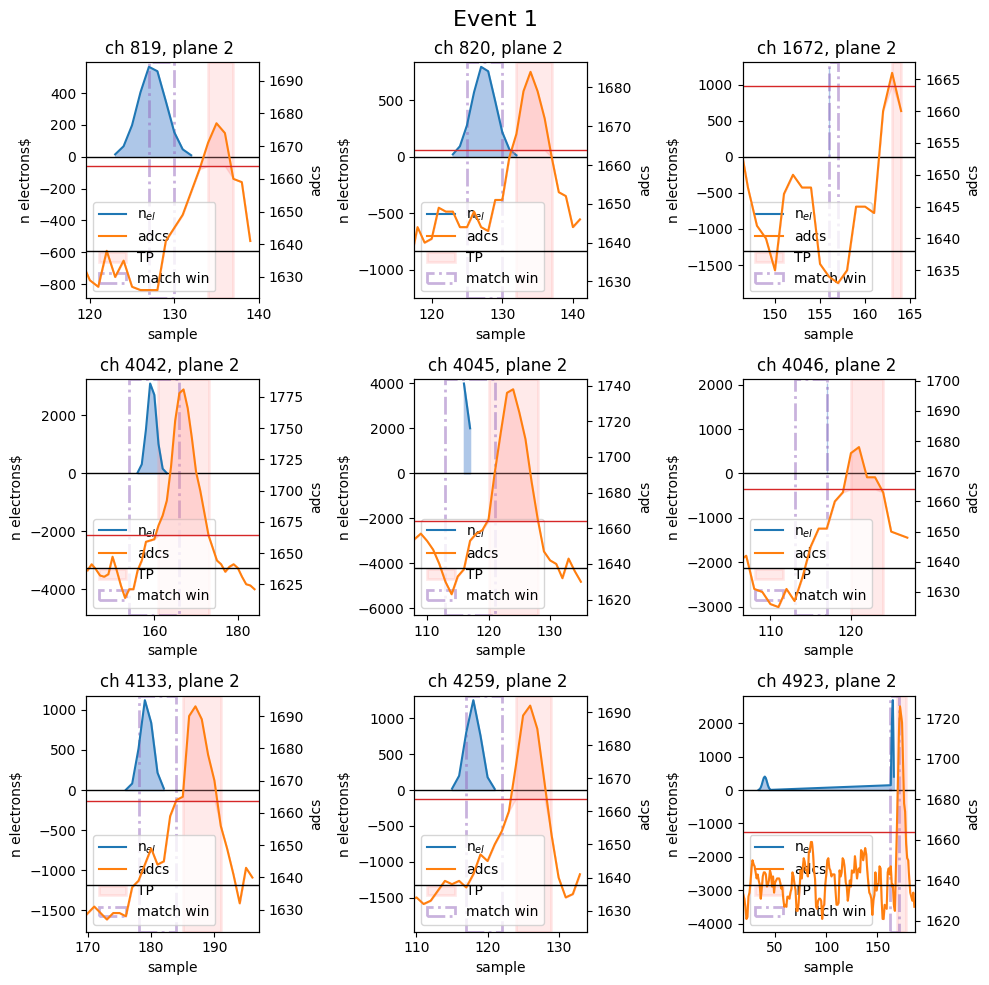

In [45]:
my_tps = bt.inspect_tps[(bt.inspect_tps.TP_startT > 100) & (bt.inspect_tps.TP_startT < 200) & (bt.inspect_tps.TP_plane == 2)].iloc[:9]
fig = bt.plot_tps_vs_ides(my_tps, figsize=(10,10))
fig.tight_layout()


In [ ]:
tpws.waveforms[1]['sample_id'] = np.arange(0, len(tpws.waveforms[1]))


In [ ]:
wf = tpws.waveforms[1]

In [ ]:
wf.iloc[0:100].std()

event         0.000000
run           0.000000
subrun        0.000000
8             4.449254
9             4.355549
               ...    
41468         9.368004
41469         9.349747
41470         9.035083
41471         7.473394
sample_id    29.011492
Length: 32835, dtype: float64

In [ ]:
x = wf.drop(['event', 'run', 'subrun', 'sample_id'], axis=1)

In [ ]:
x

,8,9,11,14,24,27,29,30,33,34,...,41462,41463,41464,41465,41466,41467,41468,41469,41470,41471
0,7360,7376,7376,7372,7381,7379,7381,7361,7365,7388,...,1632,1644,1641,1647,1628,1636,1624,1627,1631,1639
0,7362,7372,7372,7365,7379,7373,7382,7361,7373,7389,...,1631,1644,1641,1655,1637,1645,1625,1630,1629,1638
0,7366,7372,7377,7363,7372,7375,7374,7369,7382,7378,...,1630,1638,1634,1642,1639,1649,1634,1638,1630,1634
0,7365,7368,7372,7367,7371,7366,7372,7379,7378,7374,...,1625,1644,1636,1640,1635,1651,1634,1637,1638,1629
0,7368,7370,7376,7369,7366,7367,7372,7385,7374,7368,...,1623,1640,1640,1629,1631,1646,1636,1637,1634,1626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,7366,7373,7367,7371,7379,7373,7371,7373,7368,7381,...,1631,1649,1630,1636,1640,1629,1630,1638,1630,1641
0,7366,7376,7374,7369,7370,7370,7372,7372,7373,7380,...,1634,1647,1626,1638,1645,1626,1631,1638,1629,1651
0,7363,7376,7372,7376,7370,7368,7368,7374,7373,7381,...,1640,1638,1633,1648,1651,1626,1642,1629,1636,1658
0,7366,7376,7371,7374,7373,7371,7363,7377,7376,7371,...,1654,1638,1644,1654,1655,1630,1653,1619,1636,1659


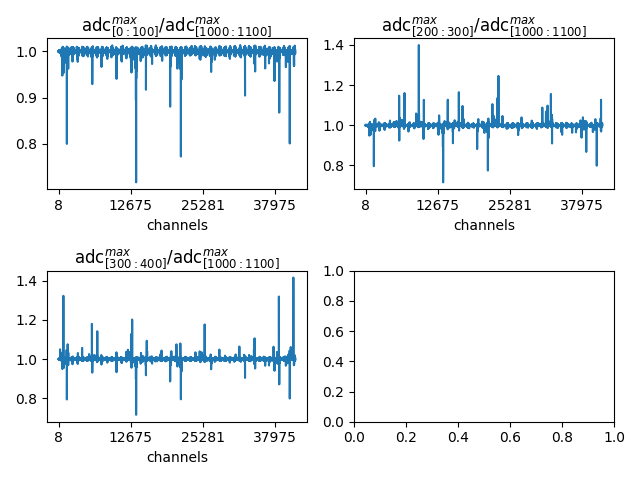

In [ ]:
a = x.iloc[:100].max()
b = x.iloc[200:300].max()
c = x.iloc[300:400].max()
d = x.iloc[1000:1100].max()

fig, ax = plt.subplots(2,2)
ax[0][0].set_title(r'adc$^{max}_{[0:100]}$/adc$^{max}_{[1000:1100]}$')
ax[0][0].set_xlabel('channels')
(a/d).plot(ax=ax[0][0])

ax[0][1].set_title(r'adc$^{max}_{[200:300]}$/adc$^{max}_{[1000:1100]}$')
(b/d).plot(ax=ax[0][1])
ax[0][1].set_xlabel('channels')

ax[1][0].set_title(r'adc$^{max}_{[300:400]}$/adc$^{max}_{[1000:1100]}$')
(c/d).plot(ax=ax[1][0])
ax[1][0].set_xlabel('channels')

fig.tight_layout()

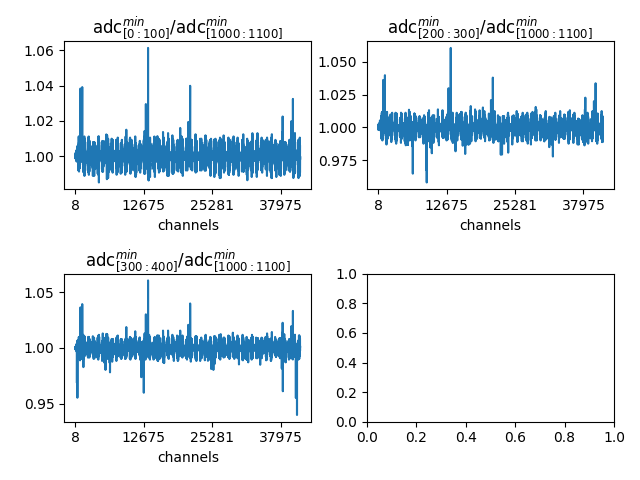

In [ ]:
a = x.iloc[:100].min()
b = x.iloc[200:300].min()
c = x.iloc[300:400].min()
d = x.iloc[1000:1100].min()

fig, ax = plt.subplots(2,2)
ax[0][0].set_title(r'adc$^{min}_{[0:100]}$/adc$^{min}_{[1000:1100]}$')
ax[0][0].set_xlabel('channels')
(a/d).plot(ax=ax[0][0])

ax[0][1].set_title(r'adc$^{min}_{[200:300]}$/adc$^{min}_{[1000:1100]}$')
(b/d).plot(ax=ax[0][1])
ax[0][1].set_xlabel('channels')

ax[1][0].set_title(r'adc$^{min}_{[300:400]}$/adc$^{min}_{[1000:1100]}$')
(c/d).plot(ax=ax[1][0])
ax[1][0].set_xlabel('channels')

fig.tight_layout()

<Axes: >

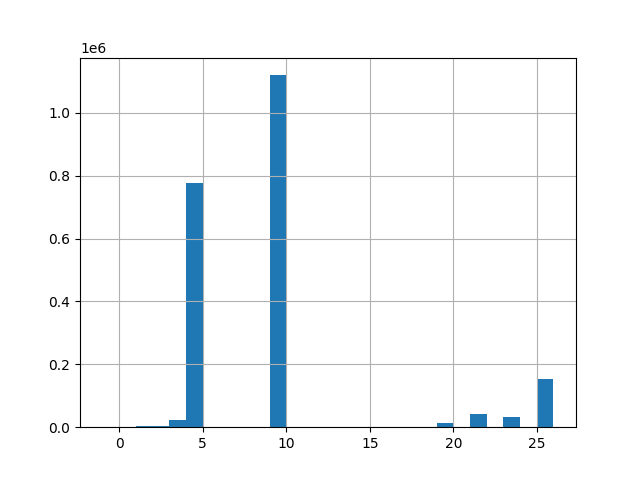

In [ ]:
fig, ax = plt.subplots()


n_bins = len(tpws.tps[tpws.tps.TP_signal == 1].TP_mcgen_key.unique())
bins = [x for x in range(-1, 25+2)]
tpws.tps[tpws.tps.TP_signal == 1].TP_mcgen_key.hist(bins=bins)

In [38]:
labels = {i:l for i,l in enumerate(ws.info['mc_generator_labels'])}
labels

{0: 'CavernNGammasAtLAr1x8x6',
 1: 'Rn222ChainBi214GenInLAr',
 2: 'Rn222ChainFromBi214GenInUpperMesh1x8x6',
 3: 'Th232ChainGenInAnode',
 4: 'CavernwallGammasAtLAr1x8x6',
 5: 'Rn222ChainFromPb210GenInUpperMesh1x8x6',
 6: 'Rn222ChainFromPb214GenInUpperMesh1x8x6',
 7: 'Rn222ChainPo218GenInLAr',
 8: 'Rn222ChainPb214GenInLAr',
 9: 'Ar39GenInLAr',
 10: 'Rn222ChainPb210GenInLAr',
 11: 'Rn222ChainFromPo218GenInUpperMesh1x8x6',
 12: 'Rn222ChainFromBi210GenInUpperMesh1x8x6',
 13: 'Ar42GenInLAr',
 14: 'Rn222ChainGenInPDS',
 15: 'K42From42ArGenInLAr',
 16: 'Rn220ChainPb212GenInLAr',
 17: 'CavernwallNeutronsAtLAr1x8x6',
 18: 'K40GenInAnode',
 19: 'U238ChainGenInCathode',
 20: 'Rn222ChainRn222GenInLAr',
 21: 'Th232ChainGenInCathode',
 22: 'K42From42ArGenInUpperMesh1x8x6',
 23: 'foamGammasAtLAr1x8x6',
 24: 'K40GenInCathode',
 25: 'U238ChainGenInAnode',
 26: 'Kr85GenInLAr',
 27: 'CryostatNGammasAtLAr1x8x6',
 28: 'Rn220ChainFromPb212GenInUpperMesh1x8x6'}

In [39]:
labels = ['noise'] + ws.info['mc_generator_labels']
bins = [i for i in range(-1, len(ws.info['mc_generator_labels'])+1)]


Text(0.5, 0, 'mc key')

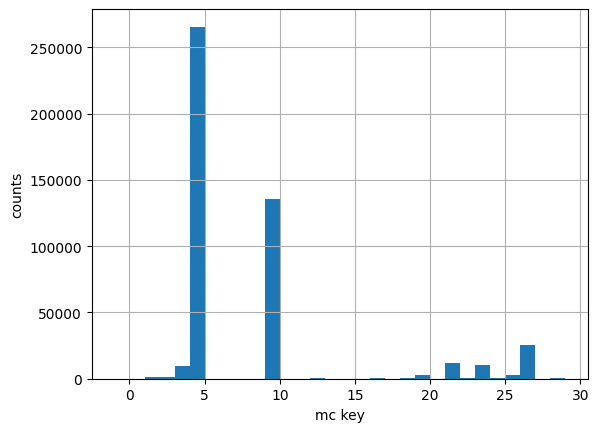

In [50]:
fig, ax = plt.subplots()

ws.tps[(ws.tps.TP_signal == 1) & (ws.tps.TP_peakADC > 45) & (ws.tps.TP_TOT > 7)].TP_mcgen_key.hist(bins=bins, ax=ax)
ax.set_ylabel('counts')
ax.set_xlabel('mc key')

# plt.xticks([ p+0.5 for p in bins[:-1]], labels)  
# plt.xticks(rotation=60, ha='right')


189

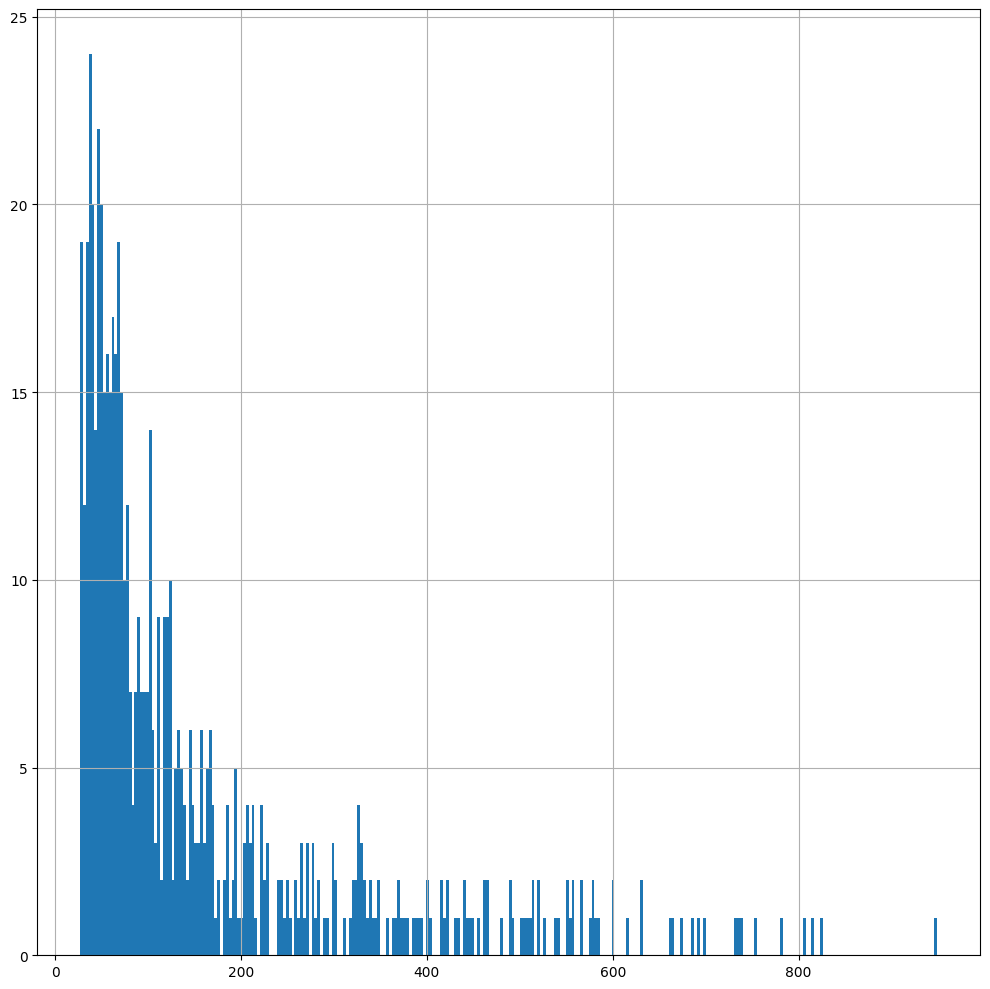

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))

# tp_ana.tps.sig_p2[tp_ana.tps.sig_p2.TP_mcgen_key == 9].plot.scatter(x='TP_trueX', y='TP_trueZ', s=1, alpha=0.05, ax=ax)
# tp_ana.tps.sig_p2[tp_ana.tps.sig_p2.TP_mcgen_key == 4].plot.scatter(x='TP_trueX', y='TP_trueZ', s=1, alpha=0.05, ax=ax, c='orange')
# tp_ana.tps.sig_p2[tp_ana.tps.sig_p2.TP_mcgen_key == 26].plot.scatter(x='TP_trueX', y='TP_trueZ', s=1, alpha=0.05, ax=ax, c='red')
# tp_ana.tps.sig_p2[tp_ana.tps.sig_p2.TP_n_mcgen > 1].plot.scatter(x='TP_trueX', y='TP_trueZ', s=1, ax=ax)
tp_ana.tps.sig_p2[tp_ana.tps.sig_p2.TP_n_mcgen > 1].TP_peakADC.hist(bins=300)


fig.tight_layout()

len(tp_ana.tps.sig_p2[(tp_ana.tps.sig_p2.TP_n_mcgen > 1) & (tp_ana.tps.sig_p2.TP_peakADC < 60)])